In [1]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('Athletes_summer_games.csv')

In [6]:
data

,Unnamed: 0,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,24.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,1,A Lamusi,M,23.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,2,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237668,15116,ZWOLINSKA Klaudia,F,22.0,Poland,POL,2020 Summer,2020,Summer,Tokyo,Canoe Slalom,Women's Kayak,NaN
237669,15117,ZYKOVA Yulia,F,25.0,Russia,ROC,2020 Summer,2020,Summer,Tokyo,Shooting,50m Rifle 3 Positions Women,Silver
237670,15118,ZYUZINA Ekaterina,F,24.0,Russia,ROC,2020 Summer,2020,Summer,Tokyo,Sailing,Women's One Person Dinghy - Laser Radial,NaN
237671,15119,ZYZANSKA Sylwia,F,24.0,Poland,POL,2020 Summer,2020,Summer,Tokyo,Archery,Women's Individual,NaN


In [12]:
data.isna().any()

Unnamed: 0    False
Name          False
Sex           False
Age            True
Team          False
NOC           False
Games         False
Year          False
Season        False
City          False
Sport         False
Event         False
Medal          True
dtype: bool

In [19]:
data_filter = data.dropna(subset='Medal')

In [39]:
data_filter = data_filter[data_filter['Year']>1999]

In [40]:
data_filter.isna().any()

Unnamed: 0    False
Name          False
Sex           False
Age           False
Team          False
NOC           False
Games         False
Year          False
Season        False
City          False
Sport         False
Event         False
Medal         False
dtype: bool

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

df = data_filter.copy()

# Encode categorical variables
label_encoders = {}
for column in ['Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Event', 'Medal']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
    
df

,Unnamed: 0,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
33,79,7048,0,27.0,111,83,2,2008,0,1,27,184,1
96,158,2907,1,21.0,78,57,4,2016,0,3,34,356,0
97,159,3929,1,30.0,137,34,2,2008,0,1,23,156,0
99,161,6743,0,21.0,7,6,4,2016,0,3,45,454,0
101,163,5550,0,22.0,121,96,2,2008,0,1,4,56,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237654,15102,9343,1,23.0,25,20,5,2020,0,5,2,335,0
237657,15105,9344,1,22.0,137,34,5,2020,0,5,24,218,2
237658,15106,9345,1,24.0,121,93,5,2020,0,5,0,218,2
237664,15112,9346,1,24.0,57,43,5,2020,0,5,46,328,1


<Axes: >

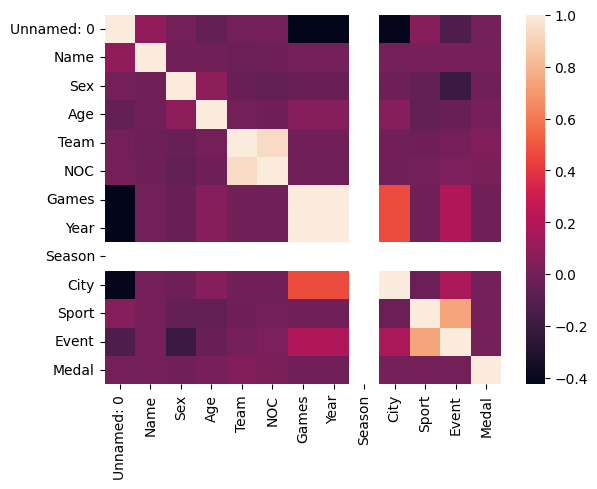

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
sns.heatmap(corr)

In [43]:
# Separate features and target
X = df.drop(columns=['Medal', 'Age'])
y = df['Medal']

# Encode target variable
y = LabelEncoder().fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [46]:
# Predict on the test set
y_pred = model.predict(X_test)

In [47]:
# Evaluate the model
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.69      0.67      1269
           1       0.67      0.70      0.69      1233
           2       0.68      0.63      0.65      1238

    accuracy                           0.67      3740
   macro avg       0.67      0.67      0.67      3740
weighted avg       0.67      0.67      0.67      3740

0.6713903743315508
